# 네이버 뉴스 기사 분석

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import re
import gensim 
#import mglearn
import numpy as np
import pandas as pd
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

# <font color='green'> 1. 네이버뉴스 기사 판다스로 변경

In [4]:
%pwd
def summary(df) :
    pd.set_option('display.max_rows', 20)
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes, 
                        '비 결측치 수(notnull' : df.notnull().sum(),
                        '결측치 수(null)' : df.isnull().sum(), 
                        '고유값 수(nunique)' : df.nunique()})
    return tf

'C:\\Users\\NFSI291\\1A1A\\naver news\\script_news'

In [5]:
dir_path = 'D:/2020기본과제/naver/data/'

In [6]:
import glob
','.join(glob.glob(dir_path + '../crawling/*.*'))

'D:/2020기본과제/naver/data/../crawling\\2017.07.01AI.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01BSE.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01E.coli.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01GMO.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01곰팡이독소.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01광우병.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01기생충.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01농약.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01다이옥신.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01동물용의약품.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01리스테리아.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01멜라민.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01발암.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01방사능.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01비스페놀A.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01살모넬라.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01수의약품.txt,D:/2020기본과제/naver/data/../crawling\\2017.07.01식중독.txt,D:/2020기본과제/nav

## 텍스트파일 merge

In [7]:
with open(dir_path + '../crawling/total.txt', 'w',encoding='utf-8') as outfile:
    for names in glob.glob(dir_path + '../crawling/*.*'):
          with open(names, 'r', encoding='utf-8') as infile:
                outfile.write(infile.read()) 

3415445

335309

24097

1405633

216806

872819

553489

4335352

370650

859864

82192

195369

5112180

1386340

188600

357211

149810

1453626

2849713

5150956

1420895

732662

4356932

2195655

2062558

2913535

5025886

180205

46073

1419521

324185

510239

435037

2878424

169135

440460

74726

138346

4260337

1525838

290801

476927

122116

1938953

2664515

4656064

1323630

1266206

2257182

1599861

1505058

1809293

3780233

25682

4028

747348

200302

233980

2092169

1997760

127748

1078389

268588

111638

3103623

2804613

137425

364666

197502

2165357

4263580

4323238

809726

850927

1815296

1738110

1877925

2464023

117920592

## 텍스트파일 읽고 날짜, 소스, 제목, 내용을 판다스로 변경

In [8]:
with open(dir_path + '../crawling/total.txt', 'r', encoding='utf-8') as file:
    texts = file.readlines()

In [9]:
date=[]; source=[]; title=[]; content=[]
for text in texts :
    if len(text.split('\t')) >= 4 :
        date.append(text.split('\t')[0])
        source.append(text.split('\t')[1])
        title.append(text.split('\t')[2])
        content.append(text.split('\t')[3])
    else :
        pass
     
df = pd.DataFrame(zip(date, source, title, content), columns=['date', 'source', 'title', 'contents'])

In [10]:
df.head()
df.tail()
df.shape

,date,source,title,contents
0,2018.06.29.,조선비즈,"뷰노, AI 기반 심정지 예측 소프트웨어 유효성 입증",국내 최초의 의료 인공지능(AI) 스타트업 뷰노(VUNO)가 개발한 ‘AI 기반 심...
1,2018.06.29.,eTimesinternet Co,심정지 예측 85% AI 시스템 개발..내년 상용화 전망,뷰노메드 DEWS24시간 내 85% 정확도로 심정지를 예측하는 인공지능 시스템이 개...
2,2018.06.29.,한경닷컴,"뷰노 심정지 예측 AI, 임상 연구 미국심장협회지에 게재",[ 임유 기자 ] 의료용 인공지능(AI) 전문기업 뷰노(대표 이예하)가 자사가 개...
3,2018.06.29.,MoneyToday,롯데제과의 AI 실험 '가속도'…과자도 파이도 변신,[머니투데이 김소연 기자] 롯데제과가 식품업계 최초로 도입한 인공지능(AI) 로봇 ...
4,2018.06.26.,edaily,"구글 AI 책임자 ""모두를 위한 AI"" 강조..AI 대중화 시대","- 제프 딘 구글AI 총괄, 구글 제품 뿐만 아니라 외부 기관·기업도 AI 필요- ..."


,date,source,title,contents
166451,2019.10.19.,세계닷컴,만성염증을 치유하는 ‘항염증 식사 한접시’,이경미/판미동/1만6800원 만성 염증을 치유하는 한 접시 건강법/이경미/판미동...
166452,2019.11.08.,머니S,자고 나니 70조원 시장… ‘프로바이오틱스’가 뭐길래,/사진=이미지투데이최근 제약·바이오업계에선 장내 미생물에 영향을 미치는 ‘프로바이오...
166453,2019.11.16.,세계닷컴,스스로 몸을 치유하는 힘... 질병에 맞서 싸우는 ‘면역’,하기와라 기요후미 / 황소연 / 전나무숲 / 1만7000원 내 몸 안의 주치의 ...
166454,2019.08.22.,머니S,"올가홀푸드, 신선배송서비스 중심 차별화포맷 도입 ‘바이올가 분당서현점’ 오픈",풀무원 계열의 LOHAS Fresh Market 유통기업 올가홀푸드가 경기도 성남시...
166455,2019.07.29.,매경닷컴,[불황 늪에서 피어나는 연꽃기업] (7) 이원철 링거워터 대표| 전문의가 직접 개발...,"“군의관님, 추위에 수액이 얼어버렸습니다.”이원철 링거워터 대표가 군의관 시절 실제..."


(166456, 4)

In [58]:
df.to_pickle(dir_path + '../data/df.pkl')

In [11]:
df = pd.read_pickle(dir_path + '../data/df.pkl')

In [12]:
df.head()
df.shape

,date,source,title,contents
0,2018.06.29.,조선비즈,"뷰노, AI 기반 심정지 예측 소프트웨어 유효성 입증",국내 최초의 의료 인공지능(AI) 스타트업 뷰노(VUNO)가 개발한 ‘AI 기반 심...
1,2018.06.29.,eTimesinternet Co,심정지 예측 85% AI 시스템 개발..내년 상용화 전망,뷰노메드 DEWS24시간 내 85% 정확도로 심정지를 예측하는 인공지능 시스템이 개...
2,2018.06.29.,한경닷컴,"뷰노 심정지 예측 AI, 임상 연구 미국심장협회지에 게재",[ 임유 기자 ] 의료용 인공지능(AI) 전문기업 뷰노(대표 이예하)가 자사가 개...
3,2018.06.29.,MoneyToday,롯데제과의 AI 실험 '가속도'…과자도 파이도 변신,[머니투데이 김소연 기자] 롯데제과가 식품업계 최초로 도입한 인공지능(AI) 로봇 ...
4,2018.06.26.,edaily,"구글 AI 책임자 ""모두를 위한 AI"" 강조..AI 대중화 시대","- 제프 딘 구글AI 총괄, 구글 제품 뿐만 아니라 외부 기관·기업도 AI 필요- ..."


(166456, 4)

# <font color='green'> 2. 데이터준비

## 결측치 확인

In [13]:
df.shape
pd.DataFrame({'결측치수':df.isnull().sum(), '고유값수':df.nunique(),
              '자료형태':df.dtypes})

(166456, 4)

,결측치수,고유값수,자료형태
date,0,1098,object
source,0,83,object
title,0,39450,object
contents,0,38965,object


In [14]:
import missingno as msno # !pip install missingno
msno.bar(df, figsize=(20,3)) # msno.matrix(df, figsize=(20,3)) 

## Null은 아니지만 space가 들어간 항목 발견

In [15]:
index_null =[]
for i in np.arange(df.shape[0]) :
    if len(df['date'][i].split('.')[0]) != 4 :
        index_null.append(i)
index_null[0:10]

[49235, 49236, 49237, 49238, 49239, 49240, 49241, 49242, 49243, 49244]

In [16]:
df['date'].isnull().sum()
df.iloc[166040:166051, :]['date'].to_list()

0

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [17]:
df.iloc[166040:166055, :]

,date,source,title,contents
166040,,,,return htParameter;\n
166041,,,,var welTomainInfoLayer = jindo.$Element('tomai...
166042,,,,"if (welTomainInfoLayer.css(""display"") == ""none..."
166043,,,,
166044,,,,
166045,,,,
166046,,,,} else {\n
166047,,,,
166048,,,,}\n
166049,,,,e.stopDefault();\n


In [18]:
# Drop a row by index
df.drop(index_null, inplace=True)

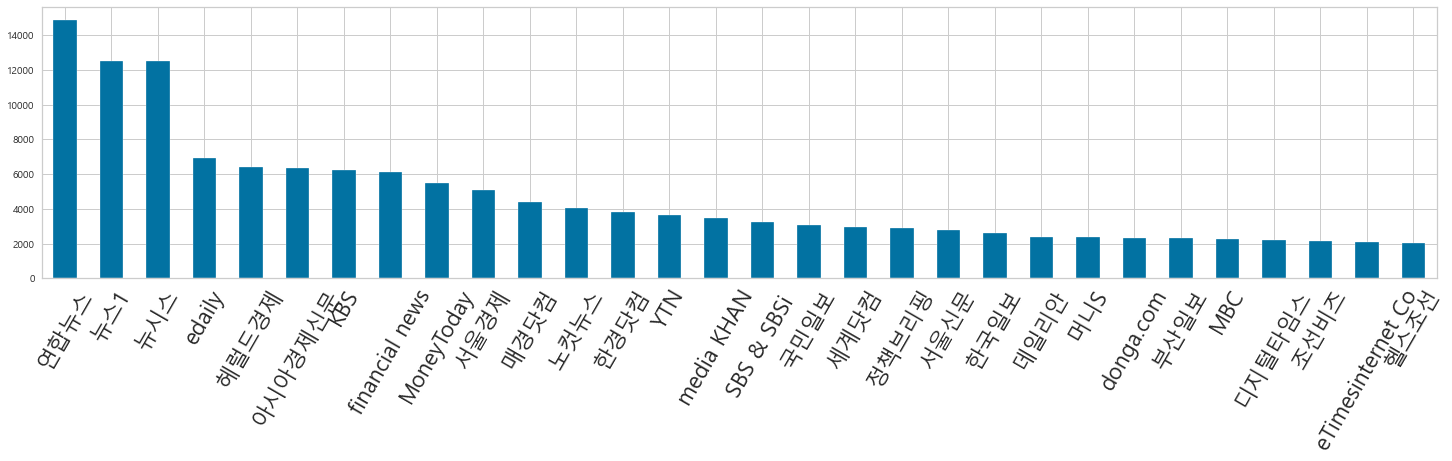

In [73]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
df.source.value_counts().nlargest(30).plot(kind='bar', rot='60', figsize=(25,5))
plt.rc('xtick', labelsize=22) 

In [20]:
sum(df.duplicated(subset=['title', 'date', 'source']))
df[df.duplicated(subset=['title'])]

124628

,date,source,title,contents
39,2017.11.18.,YTN,전북 고창 오리농장서 AI 항원 검출...방역당국 초비상,동영상 뉴스
48,2018.04.26.,MBC,전국 AI 방역대 이동제한 해제…위기경보도 하향 조정,"고병원성 조류인플루엔자, AI 방역지역 20곳에 내려졌던 이동제한 조치가 오늘 해제..."
66,2018.02.10.,YTN,AI 충남 상륙...양계 농가 초비상,동영상 뉴스
87,2017.12.23.,연합뉴스,정읍 오리농장 고병원성 AI 확진…천안 철새분변도 고병원성,성탄절 연휴 앞두고 방역비상(서울=연합뉴스) 정빛나 기자 = 전북 정읍의 육용오리 ...
108,2018.02.09.,뉴시스,고병원성 AI 방역대책 점검,【세종=뉴시스】강종민 기자 = 9일 오전 정부세종청사 농림축산식품부에 마련된 AI ...
...,...,...,...,...
166451,2019.10.19.,세계닷컴,만성염증을 치유하는 ‘항염증 식사 한접시’,이경미/판미동/1만6800원 만성 염증을 치유하는 한 접시 건강법/이경미/판미동...
166452,2019.11.08.,머니S,자고 나니 70조원 시장… ‘프로바이오틱스’가 뭐길래,/사진=이미지투데이최근 제약·바이오업계에선 장내 미생물에 영향을 미치는 ‘프로바이오...
166453,2019.11.16.,세계닷컴,스스로 몸을 치유하는 힘... 질병에 맞서 싸우는 ‘면역’,하기와라 기요후미 / 황소연 / 전나무숲 / 1만7000원 내 몸 안의 주치의 ...
166454,2019.08.22.,머니S,"올가홀푸드, 신선배송서비스 중심 차별화포맷 도입 ‘바이올가 분당서현점’ 오픈",풀무원 계열의 LOHAS Fresh Market 유통기업 올가홀푸드가 경기도 성남시...


In [21]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x : datetime.strptime(x, '%Y.%m.%d.'))

In [22]:
df.set_index('date')

,source,title,contents
date,,,
2018-06-29,조선비즈,"뷰노, AI 기반 심정지 예측 소프트웨어 유효성 입증",국내 최초의 의료 인공지능(AI) 스타트업 뷰노(VUNO)가 개발한 ‘AI 기반 심...
2018-06-29,eTimesinternet Co,심정지 예측 85% AI 시스템 개발..내년 상용화 전망,뷰노메드 DEWS24시간 내 85% 정확도로 심정지를 예측하는 인공지능 시스템이 개...
2018-06-29,한경닷컴,"뷰노 심정지 예측 AI, 임상 연구 미국심장협회지에 게재",[ 임유 기자 ] 의료용 인공지능(AI) 전문기업 뷰노(대표 이예하)가 자사가 개...
2018-06-29,MoneyToday,롯데제과의 AI 실험 '가속도'…과자도 파이도 변신,[머니투데이 김소연 기자] 롯데제과가 식품업계 최초로 도입한 인공지능(AI) 로봇 ...
2018-06-26,edaily,"구글 AI 책임자 ""모두를 위한 AI"" 강조..AI 대중화 시대","- 제프 딘 구글AI 총괄, 구글 제품 뿐만 아니라 외부 기관·기업도 AI 필요- ..."
...,...,...,...
2019-10-19,세계닷컴,만성염증을 치유하는 ‘항염증 식사 한접시’,이경미/판미동/1만6800원 만성 염증을 치유하는 한 접시 건강법/이경미/판미동...
2019-11-08,머니S,자고 나니 70조원 시장… ‘프로바이오틱스’가 뭐길래,/사진=이미지투데이최근 제약·바이오업계에선 장내 미생물에 영향을 미치는 ‘프로바이오...
2019-11-16,세계닷컴,스스로 몸을 치유하는 힘... 질병에 맞서 싸우는 ‘면역’,하기와라 기요후미 / 황소연 / 전나무숲 / 1만7000원 내 몸 안의 주치의 ...


In [23]:
df.tail(10)

,date,source,title,contents
166446,2019-08-31,세계닷컴,종근당 ‘고촌 이종근 회장 탄생 100주년 기념 신약개발 심포지엄’ 개최,종근당은 창업주 고 이종근 회장의 탄생 100주년을 맞아 ‘고촌 이종근 회장 탄생 ...
166447,2019-08-15,머니S,"올가홀푸드, 건강·지속가능성·고품격 키워드로 추석 선물세트 인기","풀무원 계열의 LOHAS Fresh Market, 올가홀푸드(대표 강병규, 이하 올..."
166448,2019-10-17,머니S,"올가홀푸드, ‘건강’과 ‘로하스’ 가치 구현할 수 있는 가을 제철 테마 먹거리선보여","풀무원 계열의 LOHAS Fresh Market, 올가홀푸드(이하 올가)가 가을 제..."
166449,2019-09-17,edaily,[이데일리가 만났습니다]반려동물 진료체계 표준화 절실… 보호자 신뢰도 높아질 듯,- 반려동물에 대한 체계적인 의료법 시행 요구 많아져- 동물병원 진료 표준화 추진으...
166450,2019-08-15,머니S,"바이오업계, 겹악재 속 임상발표… '터닝포인트' 될까",./사진=이미지투데이연이은 ‘대형사고’로 바이오산업의 불확실성이 커지는 가운데 하반...
166451,2019-10-19,세계닷컴,만성염증을 치유하는 ‘항염증 식사 한접시’,이경미/판미동/1만6800원 만성 염증을 치유하는 한 접시 건강법/이경미/판미동...
166452,2019-11-08,머니S,자고 나니 70조원 시장… ‘프로바이오틱스’가 뭐길래,/사진=이미지투데이최근 제약·바이오업계에선 장내 미생물에 영향을 미치는 ‘프로바이오...
166453,2019-11-16,세계닷컴,스스로 몸을 치유하는 힘... 질병에 맞서 싸우는 ‘면역’,하기와라 기요후미 / 황소연 / 전나무숲 / 1만7000원 내 몸 안의 주치의 ...
166454,2019-08-22,머니S,"올가홀푸드, 신선배송서비스 중심 차별화포맷 도입 ‘바이올가 분당서현점’ 오픈",풀무원 계열의 LOHAS Fresh Market 유통기업 올가홀푸드가 경기도 성남시...
166455,2019-07-29,매경닷컴,[불황 늪에서 피어나는 연꽃기업] (7) 이원철 링거워터 대표| 전문의가 직접 개발...,"“군의관님, 추위에 수액이 얼어버렸습니다.”이원철 링거워터 대표가 군의관 시절 실제..."


## A. 네이버뉴스기사 건별 문장길이, 단어 및 고유단어 수

Text(0.5, 1.0, '뉴스 기사 문장길이 분포')

Text(0.5, 1.0, '뉴스 기사 단어 수 분포')

Text(0.5, 1.0, '뉴스 기사 고유한 단어 수 분포')

뉴스 기사 문장길이 평균값 : 1330.8324579450564
뉴스 기사 문장길이 중간값 1058.0
뉴스 기사 단어 평균값 : 282.41766912743554
뉴스 기사 단어 중간값 220.0
뉴스 기사 고유 단어 평균값 : 230.2844971559966
뉴스 기사 고유 단어 중간값 187.0


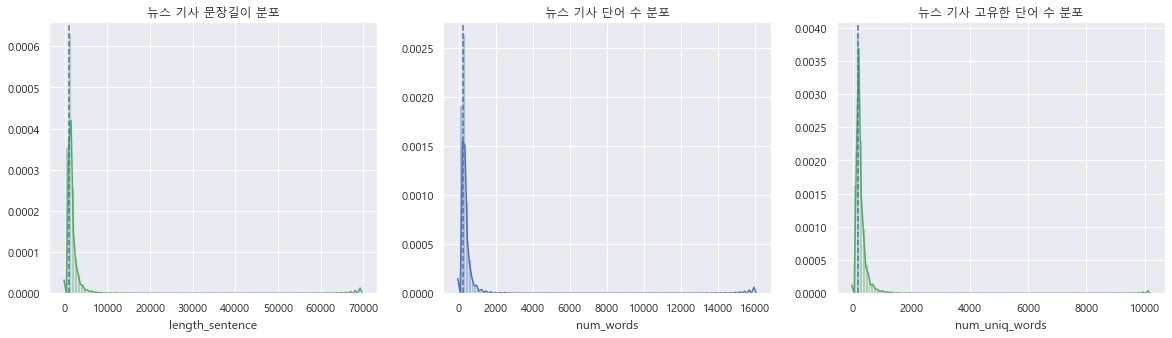

In [24]:
import seaborn as sns; sns.set()
plt.rcParams['font.family']='Malgun Gothic'
df['length_sentence'] = df['contents'].apply(lambda x: len(str(x))) # 문장길이
df['num_words'] = df['contents'].apply(lambda x: len(str(x).split())) # 단어 수
df['num_uniq_words'] = df['contents'].apply(lambda x: len(set(str(x).split()))) # 중복을 제거한 단어 수

fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)

sns.distplot(df['length_sentence'], bins=100, color='g', ax=axes[0])
axes[0].axvline(df['length_sentence'].median(), linestyle='dashed')
axes[0].set_title('뉴스 기사 문장길이 분포')

sns.distplot(df['num_words'], bins=100, ax=axes[1])
axes[1].axvline(df['num_words'].median(), linestyle='dashed')
axes[1].set_title('뉴스 기사 단어 수 분포')

sns.distplot(df['num_uniq_words'], bins=100, color='g', ax=axes[2])
axes[2].axvline(df['num_uniq_words'].median(), linestyle='dashed')
axes[2].set_title('뉴스 기사 고유한 단어 수 분포')


print('뉴스 기사 문장길이 평균값 :', df['length_sentence'].mean()) ; print('뉴스 기사 문장길이 중간값', df['length_sentence'].median())
print('뉴스 기사 단어 평균값 :', df['num_words'].mean()); print('뉴스 기사 단어 중간값', df['num_words'].median())
print('뉴스 기사 고유 단어 평균값 :', df['num_uniq_words'].mean()) ; print('뉴스 기사 고유 단어 중간값', df['num_uniq_words'].median())

## B. Time

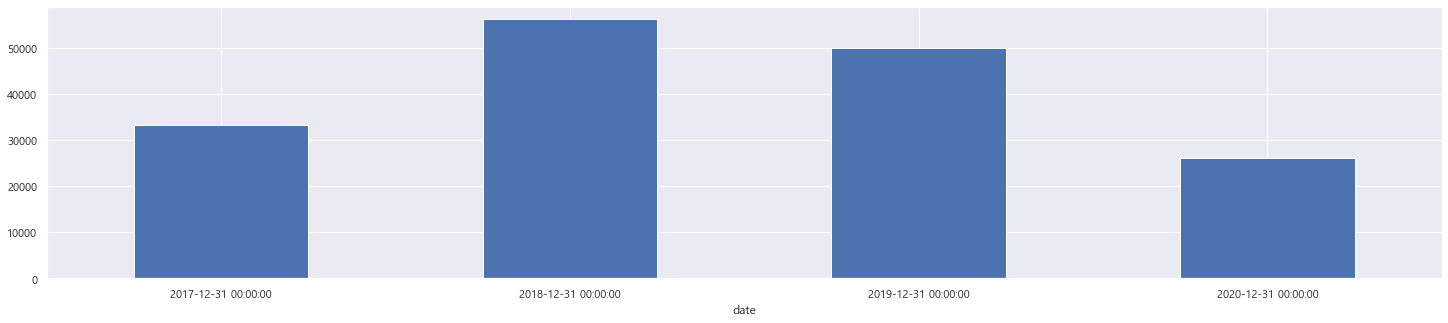

In [27]:
df['년도']=df['date'].apply(lambda x: x.year)
df['월']=df['date'].apply(lambda x: x.month)
df['요일']=df['date'].apply(lambda x: x.weekday())
df.set_index('date')['contents'].resample('Y').count().plot(kind='bar', rot='360', figsize =(25,5))

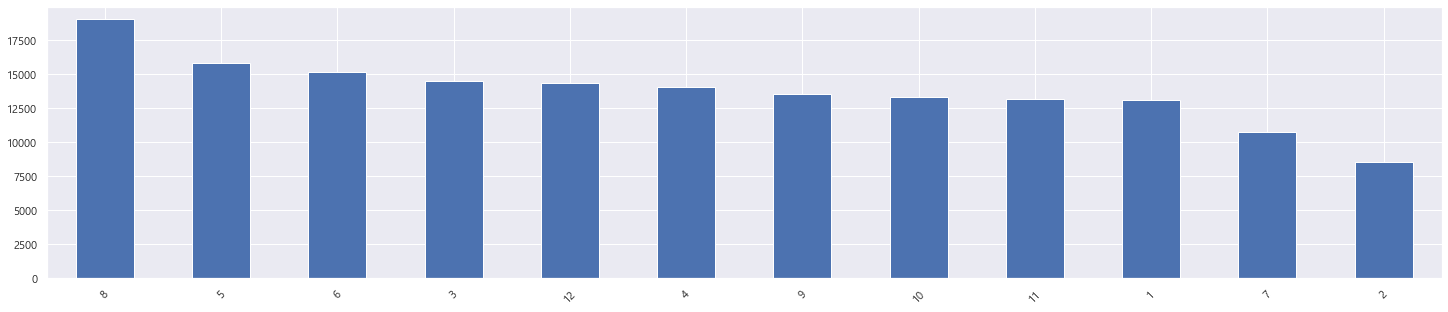

In [28]:
df.월.value_counts().plot(kind='bar', rot='45', figsize =(25,5))

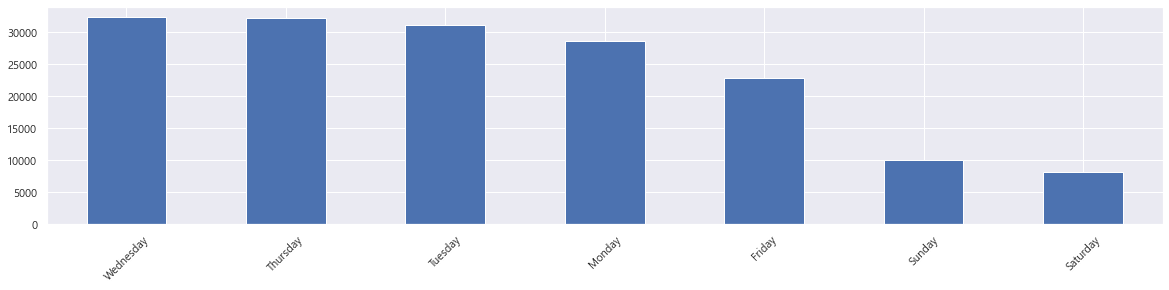

In [29]:
df['date'].apply(lambda x: x.date().strftime('%A')).value_counts().sort_values(ascending=False).plot(kind='bar', rot ='45', figsize=(20,4))

# <font color='green'> 3. 텍스트 전처리

In [77]:
from tqdm import tqdm_notebook
import re

def brush_clean (regex) :
    
    print('청소전', df.head(3))
    for pattern_string in tqdm_notebook(regex) :
        pattern = re.compile(pattern_string)
        df['contents'] = df['contents'].apply(lambda x : re.sub(pattern, ' ', str(x)))
    
    df['contents'] = df['contents'].apply(lambda x : "".join(x.replace("\n"," ")))
        
    return df['contents']

### 3.1 특수문자 제거

In [78]:
regex = ['[*]', '[.]', '[,]', '[-]', '[/]', "[`]", '["]',
        '[%]', '[?]', '[&]', '[$]', '\b', '\t', '[:]', '[)]', '[(]', '[>]', '[<]', '[:]']

brush_clean (regex)

청소전         date             source                            title  \
0 2018-06-29               조선비즈    뷰노, AI 기반 심정지 예측 소프트웨어 유효성 입증   
1 2018-06-29  eTimesinternet Co  심정지 예측 85% AI 시스템 개발..내년 상용화 전망   
2 2018-06-29               한경닷컴  뷰노 심정지 예측 AI, 임상 연구 미국심장협회지에 게재   

                                            contents  length_sentence  \
0  국내 최초의 의료 인공지능(AI) 스타트업 뷰노(VUNO)가 개발한 ‘AI 기반 심...             1472   
1  뷰노메드 DEWS24시간 내 85% 정확도로 심정지를 예측하는 인공지능 시스템이 개...              995   
2  [ 임유 기자  ] 의료용 인공지능(AI) 전문기업 뷰노(대표 이예하)가 자사가 개...             1200   

   num_words  num_uniq_words    년도  월  요일  
0        301             253  2018  6   4  
1        208             180  2018  6   4  
2        253             212  2018  6   4  


0         국내 최초의 의료 인공지능 AI  스타트업 뷰노 VUNO 가 개발한 ‘AI 기반 심...
1         뷰노메드 DEWS24시간 내 85  정확도로 심정지를 예측하는 인공지능 시스템이 개...
2         [ 임유 기자  ] 의료용 인공지능 AI  전문기업 뷰노 대표 이예하 가 자사가 개...
3         [머니투데이 김소연 기자] 롯데제과가 식품업계 최초로 도입한 인공지능 AI  로봇 ...
4           제프 딘 구글AI 총괄  구글 제품 뿐만 아니라 외부 기관·기업도 AI 필요  ...
                                ...                        
166451    이경미 판미동 1만6800원   만성 염증을 치유하는 한 접시 건강법 이경미 판미동...
166452     사진=이미지투데이최근 제약·바이오업계에선 장내 미생물에 영향을 미치는 ‘프로바이오...
166453    하기와라 기요후미   황소연   전나무숲   1만7000원   내 몸 안의 주치의 ...
166454    풀무원 계열의 LOHAS Fresh Market 유통기업 올가홀푸드가 경기도 성남시...
166455    “군의관님  추위에 수액이 얼어버렸습니다 ”이원철 링거워터 대표가 군의관 시절 실제...
Name: contents, Length: 165260, dtype: object

### 3.2 한글 혹은 영어로 시작하는 단어만 채택

In [79]:
regex = ['[^가-힣a-zA-Z\s]']

brush_clean (regex)

청소전         date             source                            title  \
0 2018-06-29               조선비즈    뷰노, AI 기반 심정지 예측 소프트웨어 유효성 입증   
1 2018-06-29  eTimesinternet Co  심정지 예측 85% AI 시스템 개발..내년 상용화 전망   
2 2018-06-29               한경닷컴  뷰노 심정지 예측 AI, 임상 연구 미국심장협회지에 게재   

                                            contents  length_sentence  \
0  국내 최초의 의료 인공지능 AI  스타트업 뷰노 VUNO 가 개발한 ‘AI 기반 심...             1472   
1  뷰노메드 DEWS24시간 내 85  정확도로 심정지를 예측하는 인공지능 시스템이 개...              995   
2  [ 임유 기자  ] 의료용 인공지능 AI  전문기업 뷰노 대표 이예하 가 자사가 개...             1200   

   num_words  num_uniq_words    년도  월  요일  
0        301             253  2018  6   4  
1        208             180  2018  6   4  
2        253             212  2018  6   4  


0         국내 최초의 의료 인공지능 AI  스타트업 뷰노 VUNO 가 개발한  AI 기반 심...
1         뷰노메드 DEWS  시간 내     정확도로 심정지를 예측하는 인공지능 시스템이 개...
2           임유 기자    의료용 인공지능 AI  전문기업 뷰노 대표 이예하 가 자사가 개...
3          머니투데이 김소연 기자  롯데제과가 식품업계 최초로 도입한 인공지능 AI  로봇 ...
4           제프 딘 구글AI 총괄  구글 제품 뿐만 아니라 외부 기관 기업도 AI 필요  ...
                                ...                        
166451    이경미 판미동  만    원   만성 염증을 치유하는 한 접시 건강법 이경미 판미동...
166452     사진 이미지투데이최근 제약 바이오업계에선 장내 미생물에 영향을 미치는  프로바이오...
166453    하기와라 기요후미   황소연   전나무숲    만    원   내 몸 안의 주치의 ...
166454    풀무원 계열의 LOHAS Fresh Market 유통기업 올가홀푸드가 경기도 성남시...
166455     군의관님  추위에 수액이 얼어버렸습니다  이원철 링거워터 대표가 군의관 시절 실제...
Name: contents, Length: 165260, dtype: object

### 3.3 달랑 '한' 글자 제거
#### 동시에 더블스페이스이상은 모두 그냥 스페이스로 변경
#### /n도 모두 제거

In [80]:
df['contents'] = df['contents'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 1]))

In [81]:
df.head()

,date,source,title,contents,length_sentence,num_words,num_uniq_words,년도,월,요일
0,2018-06-29,조선비즈,"뷰노, AI 기반 심정지 예측 소프트웨어 유효성 입증",국내 최초의 의료 인공지능 AI 스타트업 뷰노 VUNO 개발한 AI 기반 심정지 예...,1472,301,253,2018,6,4
1,2018-06-29,eTimesinternet Co,심정지 예측 85% AI 시스템 개발..내년 상용화 전망,뷰노메드 DEWS 시간 정확도로 심정지를 예측하는 인공지능 시스템이 개발됐다 기존 ...,995,208,180,2018,6,4
2,2018-06-29,한경닷컴,"뷰노 심정지 예측 AI, 임상 연구 미국심장협회지에 게재",임유 기자 의료용 인공지능 AI 전문기업 뷰노 대표 이예하 자사가 개발한 AI 기반...,1200,253,212,2018,6,4
3,2018-06-29,MoneyToday,롯데제과의 AI 실험 '가속도'…과자도 파이도 변신,머니투데이 김소연 기자 롯데제과가 식품업계 최초로 도입한 인공지능 AI 로봇 쵸니봇...,1631,341,296,2018,6,4
4,2018-06-26,edaily,"구글 AI 책임자 ""모두를 위한 AI"" 강조..AI 대중화 시대",제프 구글AI 총괄 구글 제품 뿐만 아니라 외부 기관 기업도 AI 필요 구글은 이들...,1985,472,360,2018,6,1


In [83]:
df.to_pickle(dir_path + '../data/df_processed.pkl')

In [31]:
df

,date,source,title,contents,length_sentence,num_words,num_uniq_words,년도,월,요일
0,2018-06-29,조선비즈,"뷰노, AI 기반 심정지 예측 소프트웨어 유효성 입증",국내 최초의 의료 인공지능(AI) 스타트업 뷰노(VUNO)가 개발한 ‘AI 기반 심...,1472,301,253,2018,6,4
1,2018-06-29,eTimesinternet Co,심정지 예측 85% AI 시스템 개발..내년 상용화 전망,뷰노메드 DEWS24시간 내 85% 정확도로 심정지를 예측하는 인공지능 시스템이 개...,995,208,180,2018,6,4
2,2018-06-29,한경닷컴,"뷰노 심정지 예측 AI, 임상 연구 미국심장협회지에 게재",[ 임유 기자 ] 의료용 인공지능(AI) 전문기업 뷰노(대표 이예하)가 자사가 개...,1200,253,212,2018,6,4
3,2018-06-29,MoneyToday,롯데제과의 AI 실험 '가속도'…과자도 파이도 변신,[머니투데이 김소연 기자] 롯데제과가 식품업계 최초로 도입한 인공지능(AI) 로봇 ...,1631,341,296,2018,6,4
4,2018-06-26,edaily,"구글 AI 책임자 ""모두를 위한 AI"" 강조..AI 대중화 시대","- 제프 딘 구글AI 총괄, 구글 제품 뿐만 아니라 외부 기관·기업도 AI 필요- ...",1985,472,360,2018,6,1
...,...,...,...,...,...,...,...,...,...,...
166451,2019-10-19,세계닷컴,만성염증을 치유하는 ‘항염증 식사 한접시’,이경미/판미동/1만6800원 만성 염증을 치유하는 한 접시 건강법/이경미/판미동...,1153,243,220,2019,10,5
166452,2019-11-08,머니S,자고 나니 70조원 시장… ‘프로바이오틱스’가 뭐길래,/사진=이미지투데이최근 제약·바이오업계에선 장내 미생물에 영향을 미치는 ‘프로바이오...,2799,561,476,2019,11,4
166453,2019-11-16,세계닷컴,스스로 몸을 치유하는 힘... 질병에 맞서 싸우는 ‘면역’,하기와라 기요후미 / 황소연 / 전나무숲 / 1만7000원 내 몸 안의 주치의 ...,1397,329,276,2019,11,5
166454,2019-08-22,머니S,"올가홀푸드, 신선배송서비스 중심 차별화포맷 도입 ‘바이올가 분당서현점’ 오픈",풀무원 계열의 LOHAS Fresh Market 유통기업 올가홀푸드가 경기도 성남시...,1457,314,274,2019,8,3


## WordCloud

In [130]:
# Load the text data

corpus_path = 'D:/2020기본과제/naver/data/'
corpus = pd.read_excel(dir_path + '../working/corpus.xlsx')[0][1:,].tolist()

In [127]:
# Import packages
import wikipedia
import re
# Specify the title of the Wikipedia page
wiki = wikipedia.page('Web scraping')
# Extract the plain text content of the page
text = wiki.content
# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')

In [135]:
type(text)
text

str

'Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.Web scraping a web page involves fetching it and extracting from it. Fetching is the downloading of a page (which a browser does when a user views a page). Therefore, web crawling is a main component of web scraping, to fetch pages for later processing. Once fetched, then extraction can take place. The content of a page may be parsed, searched, reformatted, its data copied into a spreadsheet, and so on. Web scrapers typically take someth

In [112]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20,15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [131]:
corpus[0:2]

['코로나 확산 우리나라 식품 주요 출국 오프라인 통한 소비 대신 온라인 구매 소비자 급격 농림축산식품부 온라인 해외 마케팅 대폭 강화 우리 식품 온라인 박람회 최하 그로 트레이드 홈페이지 한국 농수산 식품 유통 공사 웹사이트 캡처 농식품부 코로나 사태 여파 도쿄 싱가폴 베이징 예정 주요 국제 식품 박람회 취소 관련 온라인 통해 박람회 상담 진행 농식품부 한국 농수산물유통공사 운영 우리 식품 무역 사이트 그로 트레이드 이용 우리 식품 대한 온라인 박람회 농식품부 국제 식품 박람회 참가 예정 국내 업체 대상 수요 조사 실시 결과 바탕 월부 온라인 박람회 개최 농식품부 온라인 박람회 참가 업체 상품 관련 정보 해외 바이어 제공 위해 전단 제작 지원 바이어 상담 주요 국가 사용 화상 통화 지원 이용 진행 예정 농식품부 관계자 원활 온라인 상담 위해 영어 일어 중국어 통역 서비스 제공 예정 농식품부 까지 나라 유력 온라인 채널 통해 한국 식품 대한 기획 판촉 모두 차례 실시 농식품부 베트남 중국 노동절 인삼 기능 식품 수요 급증 보고 집중 마케팅 실시 영화 기생충 아카데미상 관왕 오른 계기 지난달 미국 아마존 진행 식품 판촉 까지 동남아 유럽 지역 국가 진행 김종구 식품 산업 정책 코로나 여파 우리 식품 수출 여건 크게 악화 비대 마케팅 수요 급격 아지 면서 상황 우리 식품 재도 계기 활용 윤희 선임 기자 장도리 그림 마당 보기 경향신문 바로가기 경향신문 구독 신청 경향신문 무단 재배 금지',
 '소규모 양계 농가 식용 선별 포장 부담 완화 식품의약품안전처 오늘 마리 이하 소규모 농가 유기 식품 인증 농가 위생 기준 준수 경우 선별 포장 의무 면제 내용 축산물 위생 관리 시행 규칙 개정안 입법 예고 식용 선별 포장 전문 업체 이나 오리 가금류 사육 농가 로부터 이상 포장 업체 오히려 조류인플루엔자 가축 전염병 확산 경우 위해 안전 관리인 증기 업체 인증 추가 생산 제품 이나 변경 공정 대한 위해 요소 분석 경우 인증 즉시 취소 김성훈 기자 의견 경제 채널 홈페이지 경

In [137]:
text1 = []
for i in corpus[0:2]:
    text1.append(i.split(' '))
    
words = []
for i in range(len(text1)):
    words.append(','.join(text1[i]))
words
type(words)
str(words)

['코로나,확산,우리나라,식품,주요,출국,오프라인,통한,소비,대신,온라인,구매,소비자,급격,농림축산식품부,온라인,해외,마케팅,대폭,강화,우리,식품,온라인,박람회,최하,그로,트레이드,홈페이지,한국,농수산,식품,유통,공사,웹사이트,캡처,농식품부,코로나,사태,여파,도쿄,싱가폴,베이징,예정,주요,국제,식품,박람회,취소,관련,온라인,통해,박람회,상담,진행,농식품부,한국,농수산물유통공사,운영,우리,식품,무역,사이트,그로,트레이드,이용,우리,식품,대한,온라인,박람회,농식품부,국제,식품,박람회,참가,예정,국내,업체,대상,수요,조사,실시,결과,바탕,월부,온라인,박람회,개최,농식품부,온라인,박람회,참가,업체,상품,관련,정보,해외,바이어,제공,위해,전단,제작,지원,바이어,상담,주요,국가,사용,화상,통화,지원,이용,진행,예정,농식품부,관계자,원활,온라인,상담,위해,영어,일어,중국어,통역,서비스,제공,예정,농식품부,까지,나라,유력,온라인,채널,통해,한국,식품,대한,기획,판촉,모두,차례,실시,농식품부,베트남,중국,노동절,인삼,기능,식품,수요,급증,보고,집중,마케팅,실시,영화,기생충,아카데미상,관왕,오른,계기,지난달,미국,아마존,진행,식품,판촉,까지,동남아,유럽,지역,국가,진행,김종구,식품,산업,정책,코로나,여파,우리,식품,수출,여건,크게,악화,비대,마케팅,수요,급격,아지,면서,상황,우리,식품,재도,계기,활용,윤희,선임,기자,장도리,그림,마당,보기,경향신문,바로가기,경향신문,구독,신청,경향신문,무단,재배,금지',
 '소규모,양계,농가,식용,선별,포장,부담,완화,식품의약품안전처,오늘,마리,이하,소규모,농가,유기,식품,인증,농가,위생,기준,준수,경우,선별,포장,의무,면제,내용,축산물,위생,관리,시행,규칙,개정안,입법,예고,식용,선별,포장,전문,업체,이나,오리,가금류,사육,농가,로부터,이상,포장,업체,오히려,조류인플루엔자,가축,전염병,확산,경우,위해,안전,관리인,증기,업체,인증,추가,생산,제품,이나,변경,공정,대한,위해,요소,분석,경우,인증,즉시,취소,김성훈,기자,의견,경제,채널,홈페이지,경

list

"['코로나,확산,우리나라,식품,주요,출국,오프라인,통한,소비,대신,온라인,구매,소비자,급격,농림축산식품부,온라인,해외,마케팅,대폭,강화,우리,식품,온라인,박람회,최하,그로,트레이드,홈페이지,한국,농수산,식품,유통,공사,웹사이트,캡처,농식품부,코로나,사태,여파,도쿄,싱가폴,베이징,예정,주요,국제,식품,박람회,취소,관련,온라인,통해,박람회,상담,진행,농식품부,한국,농수산물유통공사,운영,우리,식품,무역,사이트,그로,트레이드,이용,우리,식품,대한,온라인,박람회,농식품부,국제,식품,박람회,참가,예정,국내,업체,대상,수요,조사,실시,결과,바탕,월부,온라인,박람회,개최,농식품부,온라인,박람회,참가,업체,상품,관련,정보,해외,바이어,제공,위해,전단,제작,지원,바이어,상담,주요,국가,사용,화상,통화,지원,이용,진행,예정,농식품부,관계자,원활,온라인,상담,위해,영어,일어,중국어,통역,서비스,제공,예정,농식품부,까지,나라,유력,온라인,채널,통해,한국,식품,대한,기획,판촉,모두,차례,실시,농식품부,베트남,중국,노동절,인삼,기능,식품,수요,급증,보고,집중,마케팅,실시,영화,기생충,아카데미상,관왕,오른,계기,지난달,미국,아마존,진행,식품,판촉,까지,동남아,유럽,지역,국가,진행,김종구,식품,산업,정책,코로나,여파,우리,식품,수출,여건,크게,악화,비대,마케팅,수요,급격,아지,면서,상황,우리,식품,재도,계기,활용,윤희,선임,기자,장도리,그림,마당,보기,경향신문,바로가기,경향신문,구독,신청,경향신문,무단,재배,금지', '소규모,양계,농가,식용,선별,포장,부담,완화,식품의약품안전처,오늘,마리,이하,소규모,농가,유기,식품,인증,농가,위생,기준,준수,경우,선별,포장,의무,면제,내용,축산물,위생,관리,시행,규칙,개정안,입법,예고,식용,선별,포장,전문,업체,이나,오리,가금류,사육,농가,로부터,이상,포장,업체,오히려,조류인플루엔자,가축,전염병,확산,경우,위해,안전,관리인,증기,업체,인증,추가,생산,제품,이나,변경,공정,대한,위해,요소,분석,경우,인증,즉시,취소,김성훈,기자,의견,경제,채널,홈페이지,경

In [146]:
stop_words = pd.read_excel(dir_path + 'final_stopwords.xlsx')[0].to_list()

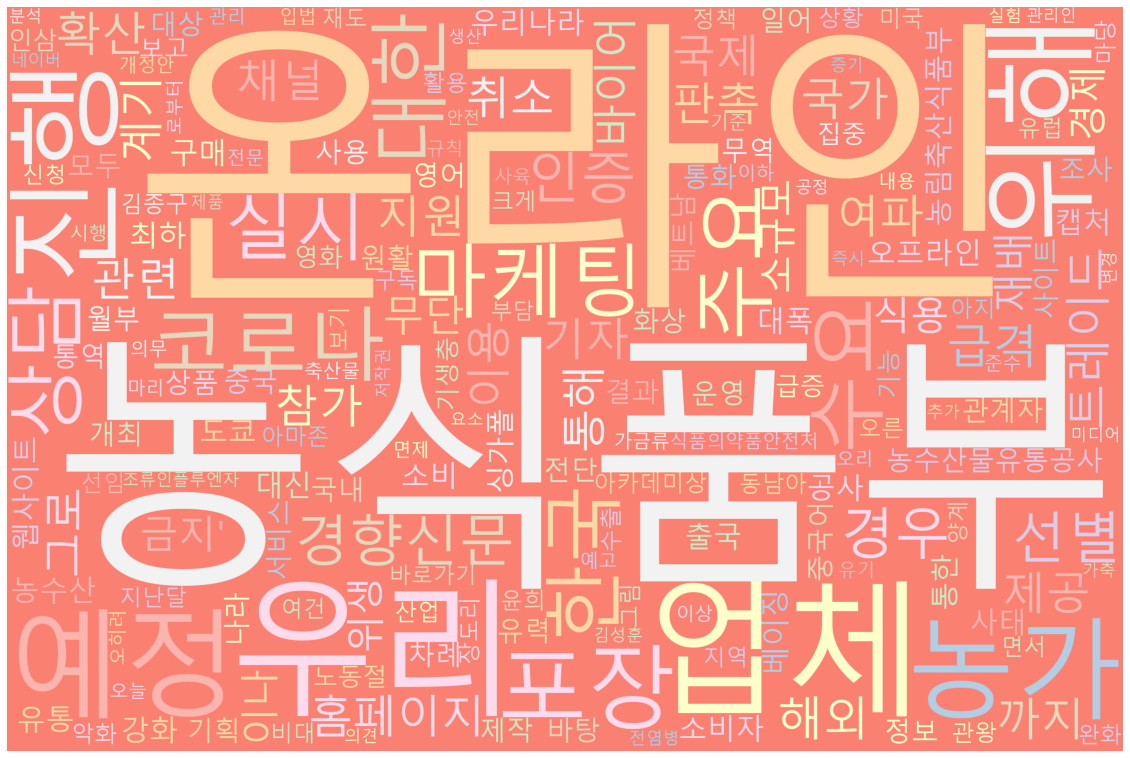

In [150]:
# Import package
from wordcloud import WordCloud, STOPWORDS
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
# Generate word cloud
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                      stopwords = ['식품', '박람회'],
                      width = 3000, height = 2000, background_color='salmon', colormap='Pastel1', collocations=False).generate(str(words))
# Plot
plot_cloud(wordcloud)

## Dispersion plot

In [152]:
from yellowbrick.text import DispersionPlot

In [153]:
text = []
for i in corpus:
    text.append(i.split(' '))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


DispersionPlot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000186EE0A3948>,
               target_words=['달걀', '식품첨가물', '배달'])

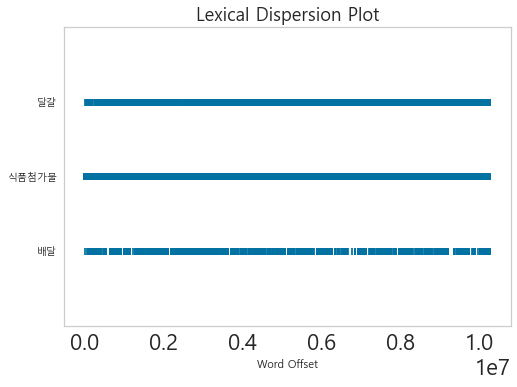

In [156]:
# Choose words whose occurence in the text will be plotted
target_words = ['달걀', '식품첨가물', '배달']

# Create the visualizer and draw the plot
visualizer = DispersionPlot(target_words)
visualizer.fit(text)
visualizer.show()

# 아래는 option

###  <font color= 'red'> 3.4 필요없는 단어 애초에 지워버리기(불용어를 정의)

### 4장 corpus 불용어를 적용 DoublespaceLineCorpus, LRNounExtractor_v2을 적용하여 재귀한다
4장을 수행하여보니 7만개 이상의 단어가 추출이 되어 7만개에 대한 불용어 작업을 한 후에해당 불용어를 원문에서 아예 삭제

### 불용어를 적용

In [51]:
dir_path = 'D:/Python_data/data/'

stpword01 = pd.read_excel(dir_path + 'naver_stopword_01.xlsx')
stpword02 = pd.read_excel(dir_path + 'naver_stopword_02.xlsx')

stpword01['불용어 여부'].value_counts(dropna=False)
stpword01['불용어 여부'].replace(0, 'stop', inplace=True)
stpword01['불용어 여부'].replace(1, 'go', inplace=True)
stpword01['불용어 여부'].value_counts(dropna=False)

stpword02['불용어 여부'].value_counts(dropna=False)
stpword02['불용어 여부'].replace(1, 'stop', inplace=True)
stpword02['불용어 여부'].replace(0, 'go', inplace=True)
stpword02['불용어 여부'].value_counts(dropna=False)

stop01 = stpword01[stpword01['불용어 여부'] == 'stop']['주제어'].tolist()
stop02 = stpword02[stpword02['불용어 여부'] == 'stop']['주제어'].tolist()
len(stop01) + len(stop02)
stop = stop01 + stop02
stop_list = list(set(stop))
len(stop)

0    34212
1     1740
Name: 불용어 여부, dtype: int64

stop    34212
go       1740
Name: 불용어 여부, dtype: int64

1    28184
0     7769
Name: 불용어 여부, dtype: int64

stop    28184
go       7769
Name: 불용어 여부, dtype: int64

62396

62396

In [86]:
dir_path = 'D:/2020기본과제/naver/data/'
stop = pd.read_excel(dir_path + './추가불용어.xlsx')
stope001 = stop[stop['yes'] == 0][0].tolist()
stope001

['일반',
 '국립',
 '었다',
 '르탄',
 '아야',
 '농림',
 '음으로',
 '조수',
 '김영록',
 '한경',
 '달리',
 '아가',
 '잠정',
 '이슈',
 '이제',
 '계기',
 '과자',
 '리얼타임',
 '이란',
 '케어',
 '연예',
 '이면',
 '상반기',
 '세트',
 '생기',
 '정기',
 '하이',
 '소하',
 '어요',
 '추세',
 '강하',
 '벤다',
 '레이',
 '이개',
 '로써',
 '얼마나',
 '학적',
 '로서',
 '가기',
 '고도',
 '간담',
 '이로',
 '고위',
 '대표이사',
 '조선',
 '따라서',
 '사가',
 '데일리안',
 '스케',
 '군사',
 '진자',
 '래서',
 '중소',
 '영암',
 '만들기',
 '도하',
 '헤럴드',
 '리기',
 '자사',
 '성능',
 '사의',
 '테크',
 '언제',
 '역대',
 '트리',
 '오른',
 '이자',
 '김현수',
 '류영진',
 '한나라',
 '전문의',
 '시비르',
 '상적',
 '제주도',
 '벌이',
 '과도',
 '청춘',
 '치명',
 '렘데',
 '수확',
 '렘데 시비르',
 '동하',
 '즉각',
 '우스',
 '자재',
 '소디',
 '우스 스냅',
 '식자',
 '거치',
 '리지',
 '상하',
 '장의',
 '잡고',
 '족하',
 '사라',
 '이처럼',
 '불금',
 '인보',
 '월간',
 '마치',
 '결하',
 '패티',
 '널리',
 '사람과',
 '까운',
 '자발',
 '간다',
 '순이',
 '대광고',
 '시제',
 '여요',
 '이사',
 '간의',
 '일명',
 '지기',
 '아예',
 '형사',
 '치면',
 '게티',
 '양하',
 '오마이',
 '단기',
 '김형욱',
 '무적',
 '직하',
 '명과',
 '자라',
 '선하',
 '기해',
 '휴가',
 '시적',
 '내기',
 '브리',
 '편이',
 '전북도',
 '취했다',
 '아리따움',
 '낙규',

In [58]:
len(stop_list)
','.join(stop_list)

61839

'청년실업난,법적대응,사시,가두캠페인,후보기술,연례학술회의,재설립,환자용식품,외국인투자가,세계인,컨벤션센터,문해교실,지역농협,환자들,오나,대응요령,선행연구,딥뉴,만갑,저장창고,역신,상하공장,독침,사회공헌,질투,행사정보,차례,옥스퍼드대학,교대근무,일리노이주,영어캠프,제임슨,정책설명회,비행,스케치,삼양화성,분기별,현장판매,팝업창,동서고금,하비,누스바움,누설률,스테인레스제,시험자료,스웨덴,닷컴,특별전형,보충제,공인시험,득표,승소,목도,철도공,매캐,일반농,철길,보스턴,안전성조사,다급,대책논의,전용라인,사회화,금상첨화,철이,친환경물질,검사과정,확대경영회의,기술전수,썩기,배리셀라,기준규격,방역기관,경영비,당사,행사라,식단제품,퓨어랜드,편집,물어봐,예고한,화학약제,폐업률,원래,낙과,나열해,정치보복,실례,허위신고,페어링,에어코리아,재강조,케어랩스,빅데이타,터빈,사업팀장,IT주,생산공방,주크,위셀,CM,흡연폐해,작약,공복감,서울본원,진의,잔류농약분야,여성성,한입,안구표면질환,농정혁신,차단용,Score,직무연관성,치졸,건너편,동아일보,인두염,상계관세,GOTS,옛날,com농림축산식품부,곡교천,정비공,천억엔,가디언XO,운영사,마션,뿜어,구좌읍,머리빠짐,흡수체,처우개선,주말,한국토종닭협회,부글부글,영양상태,한방약초장터,납품해,음주자,배급,콤팩트,나무도마,정보획득,히말라야,K쇼핑,콜린셀라,기동처리반,리드,외신들,담보,군색,공정사회,울먹,컴퓨터공학부,은쌤,바이오젠,방사선연구,사용환경,액티비아,치매국가책임제,하층민,고대안산병원,무릎골관절염,환경부담금,문제성,한국축산데이터,통관절차법,미디엄,대표집행임원,강원도지사,분유파동,산업부장,소품,전북지역,두둑,중심도시,사업군,재합성,농장간,황새치,연관산업,운영정책,위반자,잔여감,미타,예멘,월급제,MOSH,교통,오존층,마이오반트,대형사,광대,급여항목,회고영상,판정,TV광고,맛간장,블록딜,재료라,대한불교조계종,개장검사,석영환,의류업,단파장,덴버,분자유전학,중분류,공동투자,농장주변,io,종결,행동,테트라팩,판권,임원들,주곡,화곡동,띠지,민주평화당,손가락질

In [52]:
def remove_noise(input_text):
    words = input_text.split() 
    noise_free_words = [word for word in words if word not in stop_list] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [53]:
df['contents'][0:5]

0    국내 최초의 의료 인공지능(AI) 스타트업 뷰노(VUNO)가 개발한 ‘AI 기반 심...
1    뷰노메드 DEWS24시간 내 85% 정확도로 심정지를 예측하는 인공지능 시스템이 개...
2    [ 임유 기자  ] 의료용 인공지능(AI) 전문기업 뷰노(대표 이예하)가 자사가 개...
3    [머니투데이 김소연 기자] 롯데제과가 식품업계 최초로 도입한 인공지능(AI) 로봇 ...
4    - 제프 딘 구글AI 총괄, 구글 제품 뿐만 아니라 외부 기관·기업도 AI 필요- ...
Name: contents, dtype: object

In [54]:
df['contents'][0:5].apply(lambda x: remove_noise(x))

0    최초의 인공지능(AI) 스타트업 뷰노(VUNO)가 개발한 ‘AI 소프트웨어’ 상용화...
1    DEWS24시간 85% 정확도로 심정지를 예측하는 시스템이 개발됐다. 의료계에서 활...
2    [ 임유 ] 의료용 인공지능(AI) 뷰노(대표 이예하)가 자사가 개발한 소프트웨어인...
3    [머니투데이 김소연 기자] 롯데제과가 식품업계 최초로 도입한 인공지능(AI) ‘쵸니...
4    - 제프 딘 구글AI 총괄, 뿐만 아니라 기관·기업도 필요- "구글은 기업·기관이 ...
Name: contents, dtype: object

용량부족으로 추출 단어 리스트에서 제거하기로 한다

In [59]:
df['contents']

0         국내 최초의 의료 인공지능(AI) 스타트업 뷰노(VUNO)가 개발한 ‘AI 기반 심...
1         뷰노메드 DEWS24시간 내 85% 정확도로 심정지를 예측하는 인공지능 시스템이 개...
2         [ 임유 기자  ] 의료용 인공지능(AI) 전문기업 뷰노(대표 이예하)가 자사가 개...
3         [머니투데이 김소연 기자] 롯데제과가 식품업계 최초로 도입한 인공지능(AI) 로봇 ...
4         - 제프 딘 구글AI 총괄, 구글 제품 뿐만 아니라 외부 기관·기업도 AI 필요- ...
                                ...                        
166451    이경미/판미동/1만6800원   만성 염증을 치유하는 한 접시 건강법/이경미/판미동...
166452    /사진=이미지투데이최근 제약·바이오업계에선 장내 미생물에 영향을 미치는 ‘프로바이오...
166453    하기와라 기요후미 / 황소연 / 전나무숲 / 1만7000원   내 몸 안의 주치의 ...
166454    풀무원 계열의 LOHAS Fresh Market 유통기업 올가홀푸드가 경기도 성남시...
166455    “군의관님, 추위에 수액이 얼어버렸습니다.”이원철 링거워터 대표가 군의관 시절 실제...
Name: contents, Length: 165260, dtype: object

In [143]:
#df['contents'] = df['contents'].apply(lambda x: remove_noise(x))